In [41]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.linear_model import Ridge

DATA_DIR = '../data/'
countries = pd.read_csv(DATA_DIR + 'firstProjectDataTrimToElimSimilar.csv')

correlation = countries.corr()

GNIperCapitaGroup = {"positive": [], "negative": []}
noOfPharmaPGroup = {"positive": [], "negative": []}
agricultureConToSGroup = {"positive": [], "negative": []}

parameterArray = ["noOfPharmaPersonnel","GNIperCapita","agricultureConToSociety"]
parameterGroup = [GNIperCapitaGroup,noOfPharmaPGroup,agricultureConToSGroup]

for i, para in enumerate(parameterArray):
    for idx, item in enumerate(correlation[para]):
        if item > 0.65:
            parameterGroup[i]["positive"].append(correlation.index[idx])
        if item < -0.65:
            parameterGroup[i]["negative"].append(correlation.index[idx])

print "GNIperCapitaGroup : " + str(GNIperCapitaGroup) + "\n"
print "noOfPharmaPGroup : " + str(noOfPharmaPGroup) + "\n"
print "agricultureConToSGroup : " + str(agricultureConToSGroup) + "\n"


GNIperCapitaGroup : {'positive': ['PopulationinThousand', 'Number of nursing and midwifery personnel', 'noOfPharmaPersonnel', 'Number of physicians'], 'negative': []}

noOfPharmaPGroup : {'positive': ['GNIperCapita', 'Nursing and midwifery personnel density (per 10 000 population)', 'Per capita total expenditure on health (PPP int. $)', 'lifeExpectancy', 'Life expectancy at birth (years) both sexes', 'CO2_emissions', 'Cell_phones_per_100_people', 'Fixed_line_and_mobile_phone_subscribers', 'Health_expenditure_per_person'], 'negative': []}

agricultureConToSGroup : {'positive': ['Total fertility rate (per woman)', 'Infant mortality rate (per 1 000 live births) both sexes', 'Under-5 mortality rate (probability of dying by age 5 per 1000 live births) both sexes', 'agricultureConToSociety'], 'negative': ['Births attended by skilled health personnel (%)', 'lifeExpectancy', 'Life expectancy at birth (years) both sexes', 'Population with sustainable access to improved drinking water sources (%

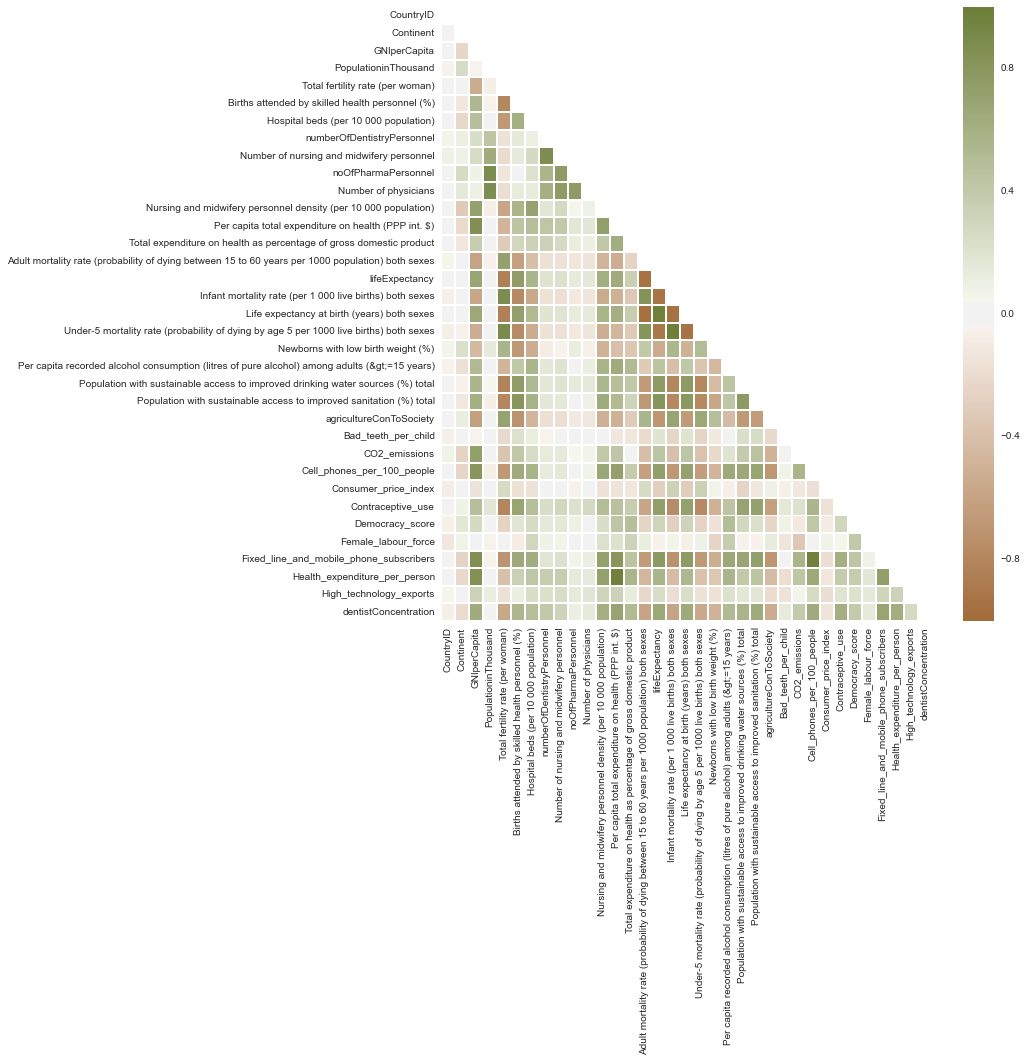

In [42]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(2200, 100, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap)

0.000255494247365
8.92677832235e-06
-0.290924821932
0.860116009932
GNIperCapita noOfPharmaPersonnel agricultureConToSociety
0.585957052339
-21.5178234424


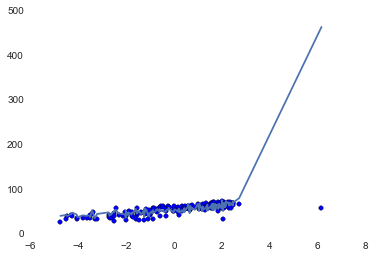

In [48]:
countries["dentistryOverPopulation"] = countries["numberOfDentistryPersonnel"] * 10 / countries["PopulationinThousand"]
countries["dentistryOverPopulationLog"] = np.log(countries["numberOfDentistryPersonnel"] * 10 / countries["PopulationinThousand"])

split = 0.7
train_idx = sample(countries.index, int(split * len(countries)))
test_idx = countries.index.difference(train_idx)

feat = ['GNIperCapita','noOfPharmaPersonnel','agricultureConToSociety','dentistryOverPopulation']
response = 'lifeExpectancy'

countries = countries.fillna(countries.mean())

X_train = countries.ix[train_idx, feat]
X_test = countries.ix[test_idx, feat]
y_train = countries.ix[train_idx, response]
y_test = countries.ix[test_idx, response]

est = Ridge(alpha=1)
est.fit(X_train, y_train)

print est.coef_[0]
print est.coef_[1]
print est.coef_[2]
print est.coef_[3]
print 'GNIperCapita noOfPharmaPersonnel agricultureConToSociety'
print est.score(X_train, y_train)
print est.score(X_test, y_test)

length = len(countries['GNIperCapita'].values)

GNIperCapita = countries['GNIperCapita'].values
noOfPharmaPersonnel = countries['noOfPharmaPersonnel'].values
agricultureConToSociety = countries['agricultureConToSociety'].values
dentistryOverPopulation = countries['dentistryOverPopulation'].values

parameters = [[GNIperCapita[i],noOfPharmaPersonnel[i],agricultureConToSociety[i],dentistryOverPopulation[i]] for i in range(length)]
countries["lifeExpecPredict"] = est.predict(parameters)
countries = countries.sort('dentistryOverPopulation')

plt.plot(countries['dentistryOverPopulationLog'], countries['lifeExpecPredict'])
plt.scatter(countries['dentistryOverPopulationLog'], countries['lifeExpectancy'])
plt.show()